In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


## Data 

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv', index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Understand Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

## Visualize 

In [6]:
import matplotlib.pyplot as plt

<Axes: xlabel='CustomerID'>

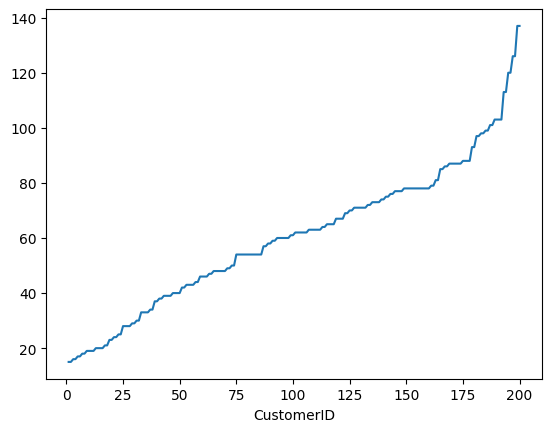

In [7]:
df['Annual Income (k$)'].plot()

<Axes: ylabel='Frequency'>

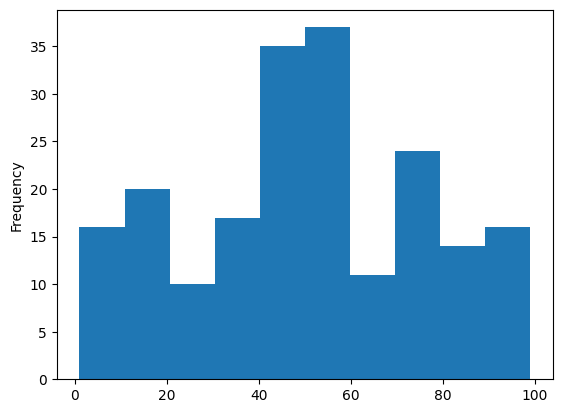

In [8]:
df['Spending Score (1-100)'].plot(kind='hist')

## 

## Feature Extraction


In [9]:
# convert Gender to numeric
df = pd.concat([df,pd.get_dummies(df['Gender'], drop_first=True)], axis=1)

In [10]:
df.drop(columns='Gender', inplace=True)

In [11]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
CustomerID,,,,
1,19,15,39,True
2,21,15,81,True
3,20,16,6,False
4,23,16,77,False
5,31,17,40,False


In [12]:
df['Male'] = df['Male'].replace({True:1, False:0})

In [13]:
df

,Age,Annual Income (k$),Spending Score (1-100),Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


## Model Building

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters = 5)
km.fit(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
preds = km.predict(df)
preds

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [17]:
df['Segments'] = preds
df

,Age,Annual Income (k$),Spending Score (1-100),Male,Segments
CustomerID,,,,,
1,19,15,39,1,3
2,21,15,81,1,4
3,20,16,6,0,3
4,23,16,77,0,4
5,31,17,40,0,3
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,1
198,32,126,74,1,2


In [18]:
df['Clusters'] = preds

In [19]:
df['Segments'].replace({2:'high_earn_less_spend',
                       1:'high_earn_high_spend',
                       0:'mid_earn_mid_spend',
                       3:'less_earn_high_spend',
                       4:'less_earn_less_spend'}, inplace=True)

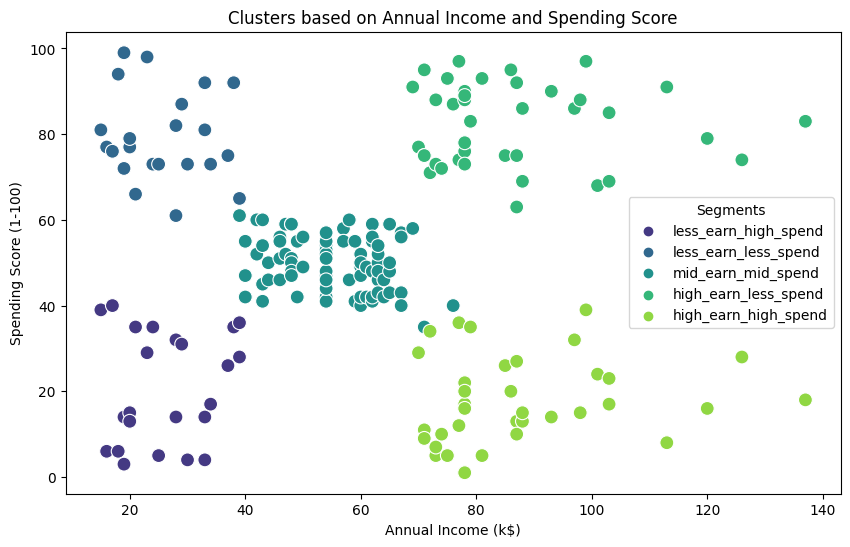

In [20]:
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'
# If not, you can create a DataFrame using pd.DataFrame(your_data, columns=your_columns)
# where your_data is the data you provided and your_columns is a list of column names

# Scatter plot between 'Annual Income' and 'Spending Score' with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segments', data=df, palette='viridis',s=100)
plt.title('Clusters based on Annual Income and Spending Score')
plt.show()


0 -> high_earn_less_spend <br>
1 -> high_earn_high_spend<br>
2 -> mid_earn_mid_spend<br>
3 -> less_earn_high_spend<br>
4 -> less_earn_less_spend<br>

In [21]:
km.predict([[21,15,81,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [22]:
df['Segments'].value_counts()

Segments
mid_earn_mid_spend      80
high_earn_less_spend    39
high_earn_high_spend    36
less_earn_high_spend    23
less_earn_less_spend    22
Name: count, dtype: int64